# Graficas densidad de energía cinética y potencial en ondas estacionarias.

=== Parámetros ===
T = 100.0 N, mu = 0.01 kg/m, L = 1.0 m, n = 4, A = 0.01 m
v = 100 m/s
k = 12.5664 rad/m
omega = 1256.64 rad/s
f = 200 Hz
Periodo = 0.005 s
lambda = 0.5 m (esperado: 2L/n = 0.5 m)

=== Chequeos físicos ===
Pendiente máxima teórica max|y_x| = 2Ak = 0.251327
Regla práctica: 2Ak << 1 para que uP=(1/2)T(y_x)^2 sea buena.

=== Validación numérica ===
Máx. error relativo en <u>(x) vs teoría: 2.000e-03 (ideal: pequeño)
Deriva relativa de E(t): 2.812e-16 (ideal: ~0, sin pérdidas)


/tmp/ipykernel_2986/469465925.py:94: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  E_t = np.trapz(uT, x, axis=1)


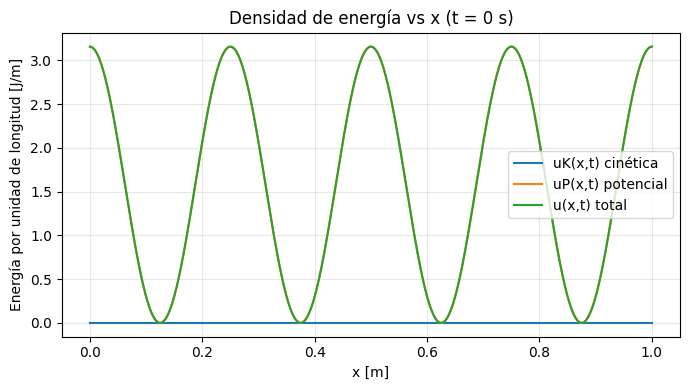

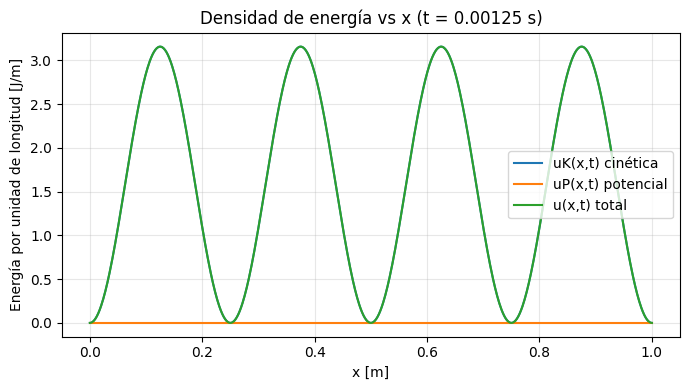

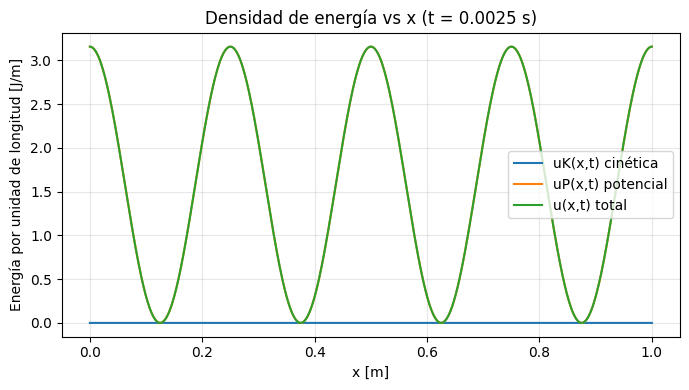

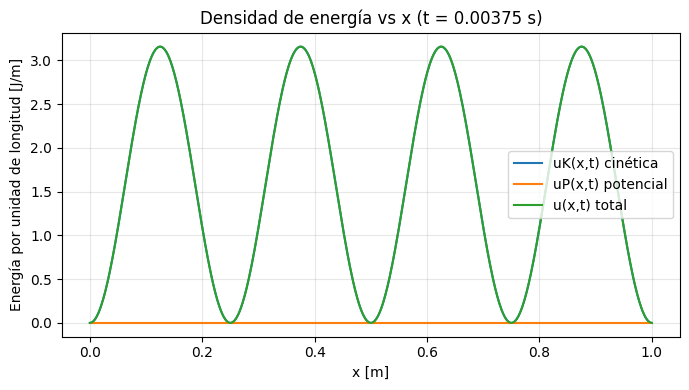

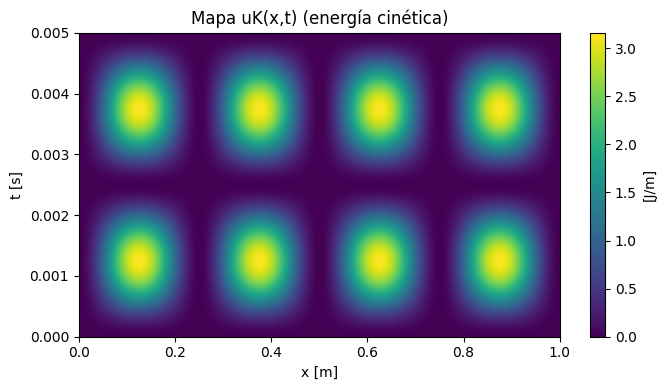

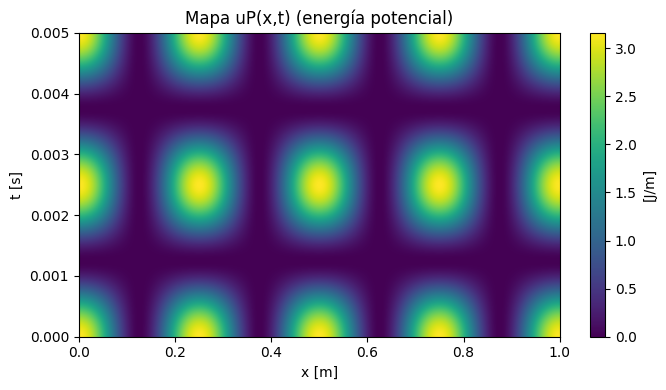

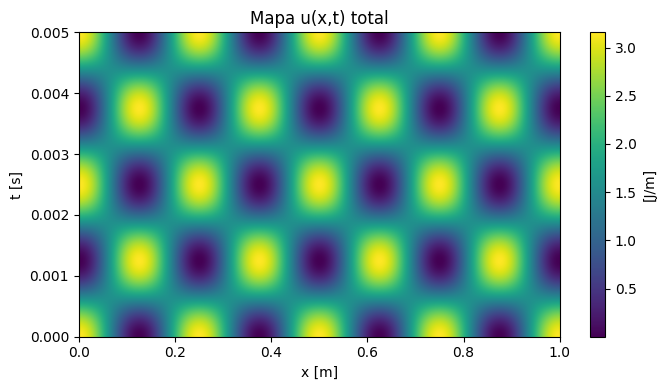

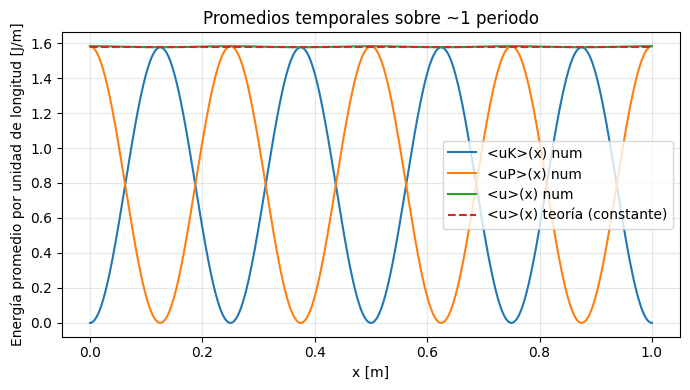

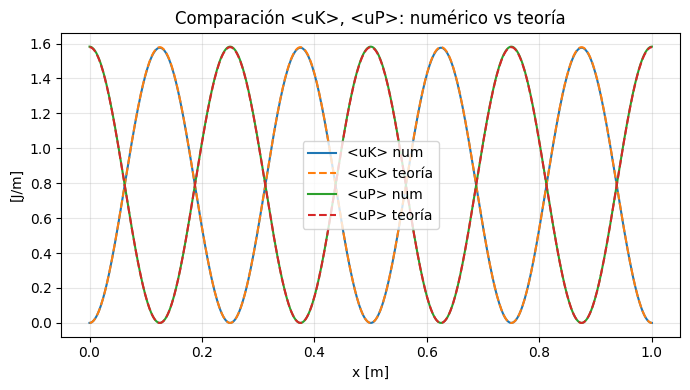

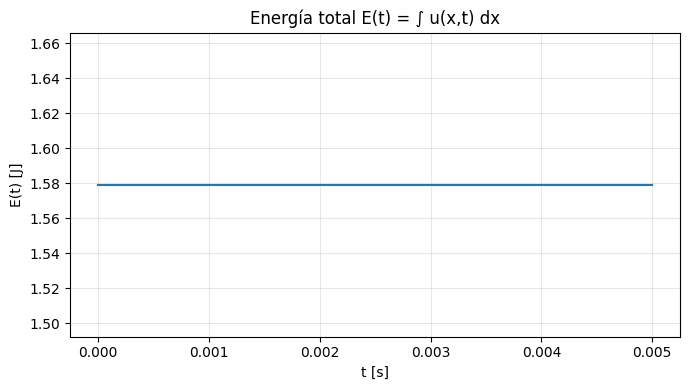

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Energía en una ONDA ESTACIONARIA en una cuerda (extremos fijos)
# y(x,t) = 2A sin(kx) cos(omega t)
#
# uK(x,t) = (1/2) * mu * (dy/dt)^2
# uP(x,t) = (1/2) * T  * (dy/dx)^2
# u = uK + uP
#
# Extremos fijos -> k = n*pi/L
# ============================================================

# --------- 1) Parámetros del problema ----------
T = 100.0        # tensión [N]
mu = 0.01        # densidad lineal [kg/m]
L = 1.0          # longitud [m]
n = 4            # modo (1,2,3,...)
A = 0.01         # parámetro de amplitud [m]
# OJO: en y = 2A sin(kx)cos(omega t), la amplitud máxima de y es 2A.

# --------- 2) Parámetros de la onda ----------
v = np.sqrt(T / mu)           # rapidez de onda [m/s]
k = n * np.pi / L             # número de onda [rad/m]
omega = v * k                 # frecuencia angular [rad/s]
periodo = 2 * np.pi / omega   # periodo [s]
f = omega / (2 * np.pi)       # frecuencia [Hz]
lam = 2*np.pi / k             # longitud de onda efectiva [m] (en la cuerda: 2L/n)

print("=== Parámetros ===")
print(f"T = {T} N, mu = {mu} kg/m, L = {L} m, n = {n}, A = {A} m")
print(f"v = {v:.6g} m/s")
print(f"k = {k:.6g} rad/m")
print(f"omega = {omega:.6g} rad/s")
print(f"f = {f:.6g} Hz")
print(f"Periodo = {periodo:.6g} s")
print(f"lambda = {lam:.6g} m (esperado: 2L/n = {2*L/n:.6g} m)")

# --------- 3) Chequeo de aproximación (pendiente pequeña) ----------
# max |dy/dx| = 2A k
slope_max = 2 * A * k
print("\n=== Chequeos físicos ===")
print(f"Pendiente máxima teórica max|y_x| = 2Ak = {slope_max:.6g}")
print("Regla práctica: 2Ak << 1 para que uP=(1/2)T(y_x)^2 sea buena.\n")

# --------- 4) Mallas de x y t ----------
Nx = 800
Nt = 500

x = np.linspace(0, L, Nx)
t = np.linspace(0, periodo, Nt)

# Mallas 2D para campos (t,x)
TT, XX = np.meshgrid(t, x, indexing="ij")

# --------- 5) Onda estacionaria y derivadas analíticas ----------
# y(x,t) = 2A sin(kx) cos(omega t)
y = 2 * A * np.sin(k * XX) * np.cos(omega * TT)

# dy/dt = -2A omega sin(kx) sin(omega t)
dydt = -2 * A * omega * np.sin(k * XX) * np.sin(omega * TT)

# dy/dx =  2A k cos(kx) cos(omega t)
dydx =  2 * A * k * np.cos(k * XX) * np.cos(omega * TT)

# --------- 6) Densidades de energía ----------
uK = 0.5 * mu * (dydt ** 2)   # [J/m]
uP = 0.5 * T  * (dydx ** 2)   # [J/m]
uT = uK + uP                  # [J/m]

# --------- 7) Promedios temporales numéricos ----------
uK_avg_num = uK.mean(axis=0)  # <uK>(x)
uP_avg_num = uP.mean(axis=0)  # <uP>(x)
uT_avg_num = uT.mean(axis=0)  # <u>(x)

# --------- 8) Promedios temporales teóricos (útil para análisis) ----------
# Para y = 2A sin(kx)cos(omega t):
# uK = 2 mu A^2 omega^2 sin^2(kx) sin^2(omega t) -> <sin^2>=1/2
# <uK> = mu A^2 omega^2 sin^2(kx)
# <uP> = mu A^2 omega^2 cos^2(kx)  (porque T k^2 = mu omega^2)
uK_avg_th = mu * (A**2) * (omega**2) * (np.sin(k*x)**2)
uP_avg_th = mu * (A**2) * (omega**2) * (np.cos(k*x)**2)
uT_avg_th = mu * (A**2) * (omega**2) * np.ones_like(x)  # constante

# Errores relativos (para validar que tu muestreo está bien)
eps = 1e-15
err_uT_avg = np.max(np.abs(uT_avg_num - uT_avg_th) / (np.abs(uT_avg_th) + eps))
print("=== Validación numérica ===")
print(f"Máx. error relativo en <u>(x) vs teoría: {err_uT_avg:.3e} (ideal: pequeño)")

# --------- 9) Energía total en la cuerda y conservación ----------
# E(t) = ∫_0^L u(x,t) dx
E_t = np.trapz(uT, x, axis=1)
drift = (E_t.max() - E_t.min()) / (E_t.mean() + eps)
print(f"Deriva relativa de E(t): {drift:.3e} (ideal: ~0, sin pérdidas)")

# --------- 10) GRÁFICA A: Cortes en x para tiempos clave ----------
tiempos = [0.0, periodo/4, periodo/2, 3*periodo/4]
idx = [np.argmin(np.abs(t - ti)) for ti in tiempos]

for ti, ii in zip(tiempos, idx):
    plt.figure(figsize=(7,4))
    plt.plot(x, uK[ii, :], label="uK(x,t) cinética")
    plt.plot(x, uP[ii, :], label="uP(x,t) potencial")
    plt.plot(x, uT[ii, :], label="u(x,t) total")
    plt.title(f"Densidad de energía vs x (t = {ti:.4g} s)")
    plt.xlabel("x [m]")
    plt.ylabel("Energía por unidad de longitud [J/m]")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

# --------- 11) GRÁFICA B: Mapas (x,t) tipo heatmap ----------
extent = [0, L, 0, periodo]

plt.figure(figsize=(7,4))
plt.imshow(uK, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa uK(x,t) (energía cinética)")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

plt.figure(figsize=(7,4))
plt.imshow(uP, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa uP(x,t) (energía potencial)")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

plt.figure(figsize=(7,4))
plt.imshow(uT, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa u(x,t) total")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

# --------- 12) GRÁFICA C: Promedios temporales vs x (numérico vs teoría) ----------
plt.figure(figsize=(7,4))
plt.plot(x, uK_avg_num, label="<uK>(x) num")
plt.plot(x, uP_avg_num, label="<uP>(x) num")
plt.plot(x, uT_avg_num, label="<u>(x) num")
plt.plot(x, uT_avg_th,  linestyle="--", label="<u>(x) teoría (constante)")
plt.title("Promedios temporales sobre ~1 periodo")
plt.xlabel("x [m]")
plt.ylabel("Energía promedio por unidad de longitud [J/m]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# (Opcional) También puedes comparar <uK> y <uP> con teoría:
plt.figure(figsize=(7,4))
plt.plot(x, uK_avg_num, label="<uK> num")
plt.plot(x, uK_avg_th,  linestyle="--", label="<uK> teoría")
plt.plot(x, uP_avg_num, label="<uP> num")
plt.plot(x, uP_avg_th,  linestyle="--", label="<uP> teoría")
plt.title("Comparación <uK>, <uP>: numérico vs teoría")
plt.xlabel("x [m]")
plt.ylabel("[J/m]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# --------- 13) GRÁFICA D: Conservación de energía total E(t) ----------
plt.figure(figsize=(7,4))
plt.plot(t, E_t)
plt.title("Energía total E(t) = ∫ u(x,t) dx")
plt.xlabel("t [s]")
plt.ylabel("E(t) [J]")
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()
